<a href="https://colab.research.google.com/github/LouranHa/my-notebook-in-ISYS2001/blob/main/visualise_twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Twitter Tweet Analysis

## Workflow
1. Install Packages
2. Get data
3. Inspect and (optiopnally) clean the data
4. Formalise questions to answer
3. Visually perform analysis, in our case sentintment analysis
  * plot number of positive, negative, neutral tweets each day
  * plot the proportion of postive, negative, neutral tweets
  * create a word cloud from the tweets

## 1. Install packges

Although this step is being executed first it the notbook, a lot of earlier research into the problem was done to identify the packages needed.

In [1]:
from google.colab import output
!curl -Ol https://raw.githubusercontent.com/michael-borck/isys2001-worksheets/main/stopwords.py
!pip install TextBlob
output.clear()
print("Required packages installed")

Required packages installed


## 2. Get the Data

In [2]:
!curl -Ol https://raw.githubusercontent.com/michael-borck/isys2001-worksheets/main/trump_tweets.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 12.3M  100 12.3M    0     0  16.0M      0 --:--:-- --:--:-- --:--:-- 16.0M


In [8]:
import pandas as pd
df = pd.read_csv('/content/trump_tweets.csv')
df.head(100)


,id,text,is_retweet,is_deleted,device,favorites,retweets,datetime,is_flagged,date
0,9.845497e+16,Republicans and Democrats have both created ou...,False,False,TweetDeck,49,255,2011-08-02T18:07:48Z,False,2011-08-02
1,1.234653e+18,I was thrilled to be back in the Great city of...,False,False,Twitter for iPhone,73748,17404,2020-03-03T01:34:50Z,False,2020-03-03
2,1.218011e+18,RT @CBS_Herridge: READ: Letter to surveillance...,True,False,Twitter for iPhone,0,7396,2020-01-17T03:22:47Z,False,2020-01-17
3,1.304875e+18,The Unsolicited Mail In Ballot Scam is a major...,False,False,Twitter for iPhone,80527,23502,2020-09-12T20:10:58Z,False,2020-09-12
4,1.218160e+18,RT @MZHemingway: Very friendly telling of even...,True,False,Twitter for iPhone,0,9081,2020-01-17T13:13:59Z,False,2020-01-17
...,...,...,...,...,...,...,...,...,...,...
95,1.346304e+18,https://t.co/X0CIj5dFlV,False,False,Twitter for iPhone,119112,24741,2021-01-05T03:55:39Z,False,2021-01-05
96,1.346304e+18,https://t.co/zkFfhX0hOQ,False,False,Twitter for iPhone,101708,21052,2021-01-05T03:55:26Z,False,2021-01-05
97,1.346304e+18,https://t.co/gWj2obEKm8,False,False,Twitter for iPhone,96065,19607,2021-01-05T03:55:15Z,False,2021-01-05
98,1.325961e+18,"As I have long said, @Pfizer and the others wo...",False,False,Twitter for iPhone,292245,59870,2020-11-10T00:40:18Z,False,2020-11-10


In [13]:
import re

def clean(text):
  ''' Uses regular expresison to extract english letter and digits from the supplied text. '''
  regExp = "(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"
  return ' '.join(re.sub(regExp, " ", text).split())

tweets_df = df[['text','date']]
tweets_df['clean Text'] = tweets_df['text'].apply(clean)
tweets_df.head()


<ipython-input-13-1ce05eab2c57>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_df['clean Text'] = tweets_df['text'].apply(clean)


,text,date,clean Text
0,Republicans and Democrats have both created ou...,2011-08-02,Republicans and Democrats have both created ou...
1,I was thrilled to be back in the Great city of...,2020-03-03,I was thrilled to be back in the Great city of...
2,RT @CBS_Herridge: READ: Letter to surveillance...,2020-01-17,RT Herridge READ Letter to surveillance court ...
3,The Unsolicited Mail In Ballot Scam is a major...,2020-09-12,The Unsolicited Mail In Ballot Scam is a major...
4,RT @MZHemingway: Very friendly telling of even...,2020-01-17,RT Very friendly telling of events here about ...


In [ ]:
import pandas as pd

tweets_df = pd.read_csv()
tweets_df['Clean Text'] = tweets_df['text'].apply(clean)
tweets_df.head()

## 3. Perform Sentiment Analysis
The sentiment function of textblob returns two properties, polarity, and subjectivity.

See: https://textblob.readthedocs.io/en/dev/index.html


### Polarity
Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement. 

### Subjectivity
Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. Subjectivity is also a float which lies in the range of [0,1].

In [15]:
from textblob import TextBlob

# Wrapper so can use Pandas apply() function on a column
def getSubjectivity(text):
    return TextBlob(str(text)).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(str(text)).sentiment.polarity

# Calculate sentiment, 
tweets_df['Subjectivity'] = tweets_df['Clean Text'].apply(getSubjectivity)
tweets_df['Polarity'] = tweets_df['Clean Text'].apply(getPolarity)

tweets_df.head()

KeyError: ignored

In [16]:
tweets_df.head(100)

,text,date,clean Text
0,Republicans and Democrats have both created ou...,2011-08-02,Republicans and Democrats have both created ou...
1,I was thrilled to be back in the Great city of...,2020-03-03,I was thrilled to be back in the Great city of...
2,RT @CBS_Herridge: READ: Letter to surveillance...,2020-01-17,RT Herridge READ Letter to surveillance court ...
3,The Unsolicited Mail In Ballot Scam is a major...,2020-09-12,The Unsolicited Mail In Ballot Scam is a major...
4,RT @MZHemingway: Very friendly telling of even...,2020-01-17,RT Very friendly telling of events here about ...
...,...,...,...
95,https://t.co/X0CIj5dFlV,2021-01-05,
96,https://t.co/zkFfhX0hOQ,2021-01-05,
97,https://t.co/gWj2obEKm8,2021-01-05,
98,"As I have long said, @Pfizer and the others wo...",2020-11-10,As I have long said and the others would only ...


ValueError: ignored

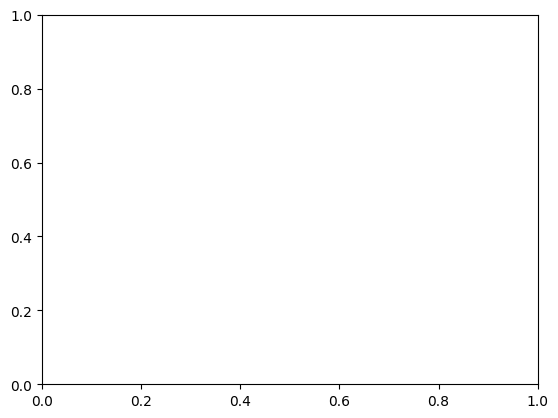

In [18]:
# Do a box plot of columns Subjectivity and Polarity
tweets_df.boxplot(column=['subjectivity','polarity'])

# Sentiment over time.

From the documentaiton, the values of polsrity can be interpreted a sentiment.  So we can *calculate* the sentiment of each tweet as either positive, negative or neutral.

> There are more precise ways, keeping it simple for thie exercise.

It could be interesting to plot these over time.  SO each day there is a number of tweets, what proportions are positive, negative or neutral.

First let us add a sentiment column


In [19]:
def sentiment(polarity):
  if polarity > 0:
      return 'positive'
  elif -0.0003 < polarity < 0.0003:
      return 'neutral'
  else:
      return 'negative'

In [21]:
# Add sentiment column
pos = tweets_df['Sentiment'] == tweet_df['polarity'].apply(sentiment)
pos

NameError: ignored

In [23]:
# Lets get just the positive tweets
pos = tweets_df[ tweets_df['sentiment'] =='positive']

KeyError: ignored

Write a function to calculate how many each day.  We will write a function because want to do this for negative and netural tweets.

In [24]:
def num_tweets(df):
    return df['Date'].value_counts().sort_index()

pos_per_day = num_tweets(pos)
pos_per_day

NameError: ignored

In [ ]:
# Plot the positive tweets per day
pos_per_day.plot()

In [25]:
# Now repeat for negative
neg = tweets_df[tweets_df['sentiment']=='posititve']

KeyError: ignored

In [ ]:
# repeat for neutral
neu = 

How about propotions of sentiment type?

Visit Python Graph Gallery, 'Part of the Whole', select 'Pie' and loot at the example

In [30]:
import matplotlib.pyplot as plt
values = [len(pos),len(neg),len(neu)]
plt.pie(values)


SyntaxError: ignored

We can do better. 

In [35]:
import matplotlib.pyplot as plt
 
values = 
labels = 
colors = 
plt.pie(values, colors=colors, labels= values)
plt.title('Sentiment Portions')
plt.legend(labels,loc=3)
plt.show()

SyntaxError: ignored

## WordCloud

Visit Python Graph Gallery, 'Ranking', select 'Word Cloud' and loot at the example

In [36]:
# Libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from stopwords import ENGLISH_STOP_WORDS

# Get all the messages
messages = ' '.join(tweets_df['Clean Text'])

stop_words = ENGLISH_STOP_WORDS.add(search_term)    
# Create the wordcloud object
wordcloud = WordCloud(width=680, height=480, margin=0, 
                      stopwords=ENGLISH_STOP_WORDS).generate(messages)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

KeyError: ignored

In [38]:
# Libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from stopwords import ENGLISH_STOP_WORDS

# Get all the messages
messages = ' '.join[tweets_df['Clean Text']]

# Remove duplicates and lowercase letters
words = set(messages.lower().split()) - ENGLISH_STOP_WORDS

# Create the wordcloud object
wordcloud = WordCloud(width=680, height=480, margin=0, background_color="white").generate(words)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

KeyError: ignored